# Installing Required External Libraries

In [2]:
!pip3 install keras
!pip3 install ann_visualizer
!apt install graphviz
!apt-get install xdg-utils
!pip install h5py
!pip install pydot

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=0f0cb7b33545440d155f6e3ed03de7b7b881fcc7de53784a0e2fb80bd6a60455
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xdg-utils is already the newest version (1.1.2-1ubuntu2.3).
xdg-utils set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly i

# Mounting Drive to get Dataset

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam

In [19]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
trdata = ImageDataGenerator()
import os; print(os.getcwd())
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/covid-19-stuff/COVID19/Train",target_size=(300,300))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/covid-19-stuff/COVID19/Test", target_size=(300,300))

/content
Found 382 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [20]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(300,300,3), kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

model.add(Conv2D(filters=12, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
# Max Pooling
model.add(MaxPool2D(pool_size=(32,32), strides=(2,2), padding="valid"))
model.add(MaxPool2D(pool_size=(16,16), strides=(2,2), padding="valid"))
model.add(MaxPool2D(pool_size=(8,8), strides=(2,2), padding="valid"))

model.add(Flatten())
model.add(Dense(units = 288, activation = "relu"))
model.add(Dropout(0.2, input_shape=(64,)))
model.add(Dense(units = 2, activation = "softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 300, 300, 12)      336       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 300, 300, 12)      1308      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 300, 300, 28)      3052      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 300, 300, 28)      7084      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 135, 135, 28)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 60, 60, 28)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 28)       

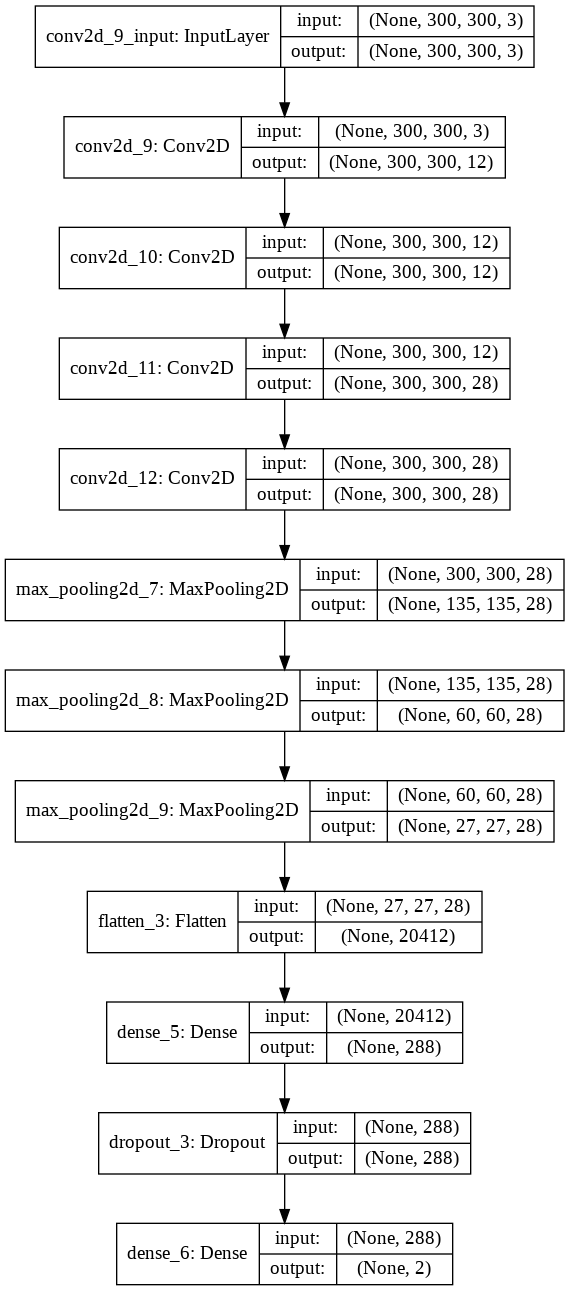

In [21]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("tahiti.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=16,callbacks=[checkpoint,early])

Epoch 1/16
10/10 [==============================] - 27s 3s/step - loss: 32.0693 - accuracy: 0.5660 - val_loss: 23.4761 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to tahiti.h5
Epoch 2/16
10/10 [==============================] - 27s 3s/step - loss: 9.4959 - accuracy: 0.6094 - val_loss: 4.4990 - val_accuracy: 0.5813

Epoch 00002: val_accuracy improved from 0.50000 to 0.58125, saving model to tahiti.h5
Epoch 3/16
10/10 [==============================] - 26s 3s/step - loss: 3.3162 - accuracy: 0.7956 - val_loss: 0.8725 - val_accuracy: 0.8375

Epoch 00003: val_accuracy improved from 0.58125 to 0.83750, saving model to tahiti.h5
Epoch 4/16
10/10 [==============================] - 26s 3s/step - loss: 1.1605 - accuracy: 0.8742 - val_loss: 0.2729 - val_accuracy: 0.9438

Epoch 00004: val_accuracy improved from 0.83750 to 0.94375, saving model to tahiti.h5
Epoch 5/16
10/10 [==============================] - 23s 2s/step - loss: 0.7104 - accuracy: 0.

In [24]:
model.save('tahiti.h5')

In [25]:
from ann_visualizer.visualize import ann_viz

model.load_weights("tahiti.h5")
ann_viz(model, title="Model Visualization")

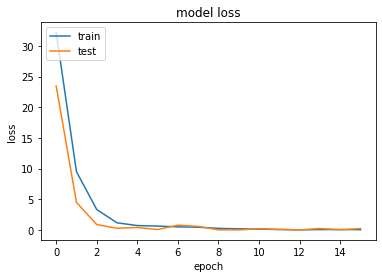

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

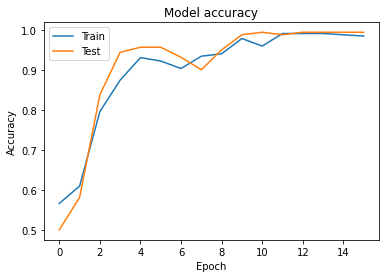

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[99.73838     0.26162574]
Positive


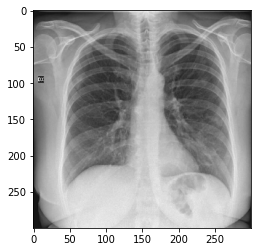

In [29]:
from keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/covid-19-stuff/COVID19/Positive.jpg",target_size=(300,300))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("tahiti.h5")
output = saved_model.predict(img)
print(np.array(output[0])*100)
if output[0][0] > output[0][1]:
    print("Positive")
else:
    print('Negative')

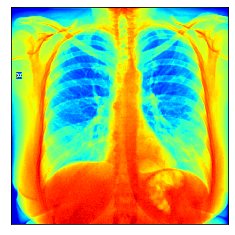

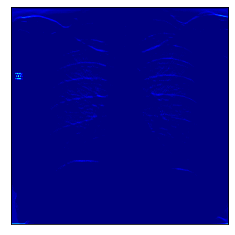

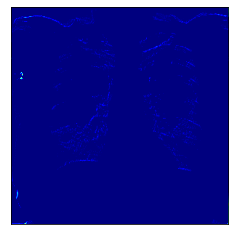

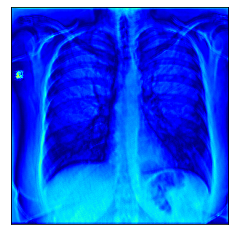

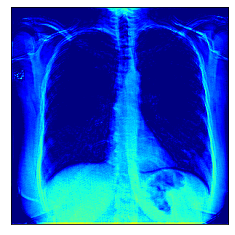

In [32]:
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
#ixs =[1,2,3,4]
#outputs = [model.layers[i].output for i in ixs]
outputs = [model.layers[i].output for i in np.arange(len(model.layers))]

model = Model(inputs=model.inputs, outputs=outputs)
img = load_img('/content/drive/My Drive/covid-19-stuff/COVID19/Positive.jpg', target_size=(300, 300))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)

square = 1
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(fmap[0, :, :, ix-1], cmap='jet')
        ix += 1
    pyplot.show()